## Handwritten Digit Recognition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                        split=['train', 'test'],
                                        shuffle_files=True,
                                        as_supervised=True,
                                        with_info=True)

In [3]:
def normalize(image, label):
    return tf.cast(image, tf.float32) / 255., label

In [4]:
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [5]:
ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

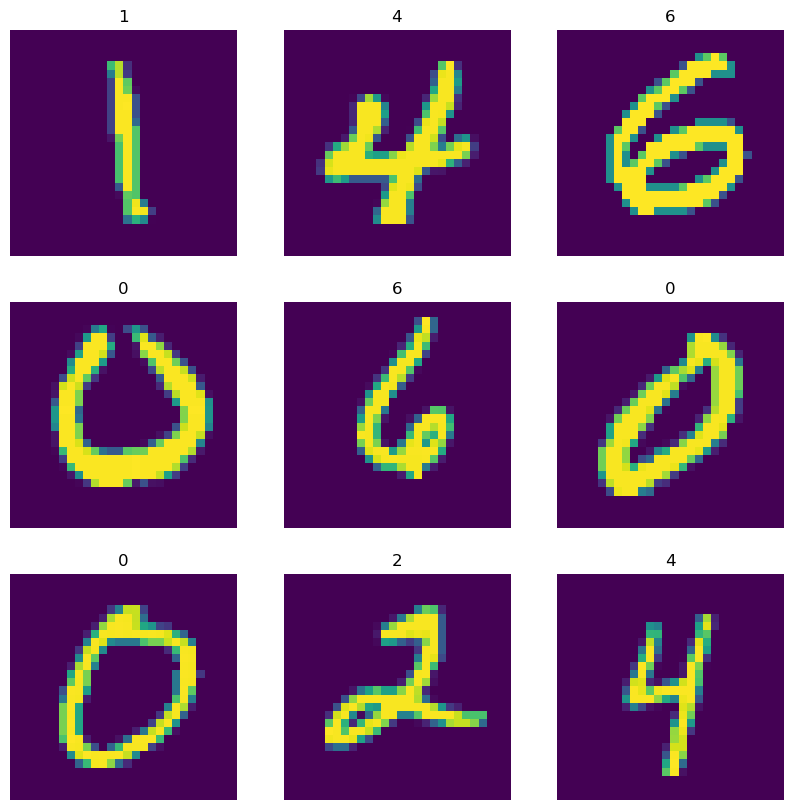

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classes[labels[i]])
        plt.axis('off')

In [8]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

C:\Users\dukea_6wbfoy1\.conda\envs\tfenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

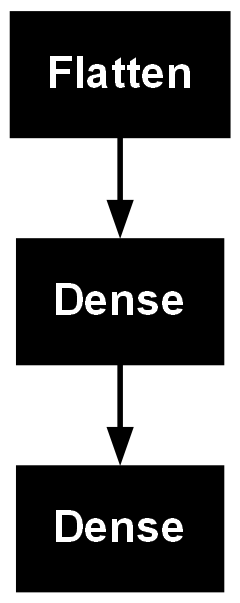

In [10]:
tf.keras.utils.plot_model(model)

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs = 20
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9015 - loss: 0.3581 - val_accuracy: 0.9423 - val_loss: 0.1974
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9531 - loss: 0.1648 - val_accuracy: 0.9592 - val_loss: 0.1379
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9665 - loss: 0.1170 - val_accuracy: 0.9675 - val_loss: 0.1050
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9736 - loss: 0.0920 - val_accuracy: 0.9731 - val_loss: 0.0909
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9789 - loss: 0.0741 - val_accuracy: 0.9740 - val_loss: 0.0850
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9822 - loss: 0.0616 - val_accuracy: 0.9769 - val_loss: 0.0769
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9855 - loss: 0.0512 - val_accuracy: 0.9761 - val_loss: 0.0769
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9879 - loss: 0.0429 - val_accuracy: 0.

In [13]:
history.history

{'accuracy': [0.9014666676521301,
  0.9530666470527649,
  0.9664833545684814,
  0.973550021648407,
  0.9789000153541565,
  0.9821666479110718,
  0.9854833483695984,
  0.9878666400909424,
  0.9900833368301392,
  0.9912166595458984,
  0.9930333495140076,
  0.9943166375160217,
  0.9954666495323181,
  0.9960833191871643,
  0.9971333146095276,
  0.9974333047866821,
  0.9978166818618774,
  0.9984166622161865,
  0.9986333250999451,
  0.9984666705131531],
 'loss': [0.358100026845932,
  0.164801687002182,
  0.11695624887943268,
  0.09199083596467972,
  0.0741426944732666,
  0.06164701655507088,
  0.051151905208826065,
  0.04291804879903793,
  0.03611418232321739,
  0.03126243129372597,
  0.026332281529903412,
  0.022470412775874138,
  0.019466154277324677,
  0.016166018322110176,
  0.013593838550150394,
  0.01188462134450674,
  0.010094590485095978,
  0.00864618830382824,
  0.007878418080508709,
  0.007643749471753836],
 'val_accuracy': [0.942300021648407,
  0.9592000246047974,
  0.967499971389

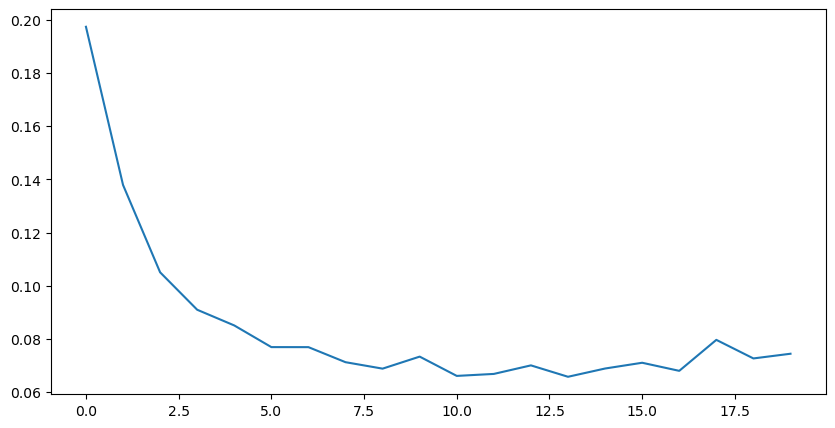

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(20), history.history['val_loss'])
plt.show()

In [16]:
model.evaluate(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9800 - loss: 0.0744


[0.07438718527555466, 0.9800000190734863]

In [17]:
pred = model.predict(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [18]:
pred

array([[2.0696254e-05, 2.3906330e-07, 1.0557474e-05, ..., 1.8369379e-07,
        9.9855214e-01, 7.8092302e-07],
       [1.6234690e-13, 2.4013316e-10, 4.7580750e-12, ..., 1.5874390e-08,
        2.8069673e-08, 9.9999845e-01],
       [2.1126247e-13, 1.7430728e-13, 2.6352755e-12, ..., 2.6015184e-17,
        3.3652878e-08, 1.9328527e-06],
       ...,
       [7.0709528e-12, 1.4782377e-14, 2.4099536e-09, ..., 1.3338982e-14,
        1.0000000e+00, 7.6678129e-11],
       [8.2630791e-15, 1.2647298e-17, 3.2751288e-08, ..., 4.7496019e-13,
        1.0296288e-14, 1.0339766e-17],
       [1.4163254e-14, 1.0826300e-13, 4.1793898e-11, ..., 1.5589439e-15,
        1.5669852e-10, 4.8810649e-05]], dtype=float32)

In [22]:
pred = list(map(lambda x: np.argmax(x), pred))
pred

[np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(8),
 np.int64(5),
 np.int64(9),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(9),
 np.int64(9),
 np.int64(9),
 np.int64(2),
 np.int64(0),
 np.int64(8),
 np.int64(9),
 np.int64(9),
 np.int64(0),
 np.int64(0),
 np.int64(5),
 np.int64(6),
 np.int64(4),
 np.int64(4),
 np.int64(1),
 np.int64(7),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(6),
 np.int64(4),
 np.int64(2),
 np.int64(1),
 np.int64(9),
 np.int64(0),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(1),
 np.int64(2),
 np.int64(8),
 np.int64(0),
 np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(5),
 np.int64(6),
 np.int64(2),
 np.int64(1),
 np.int64(4),
 np.int64(3),
 np.int64(9),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(8),
 np.int64(0),
 np.int64(6),
 np.int64(5),
 np.in

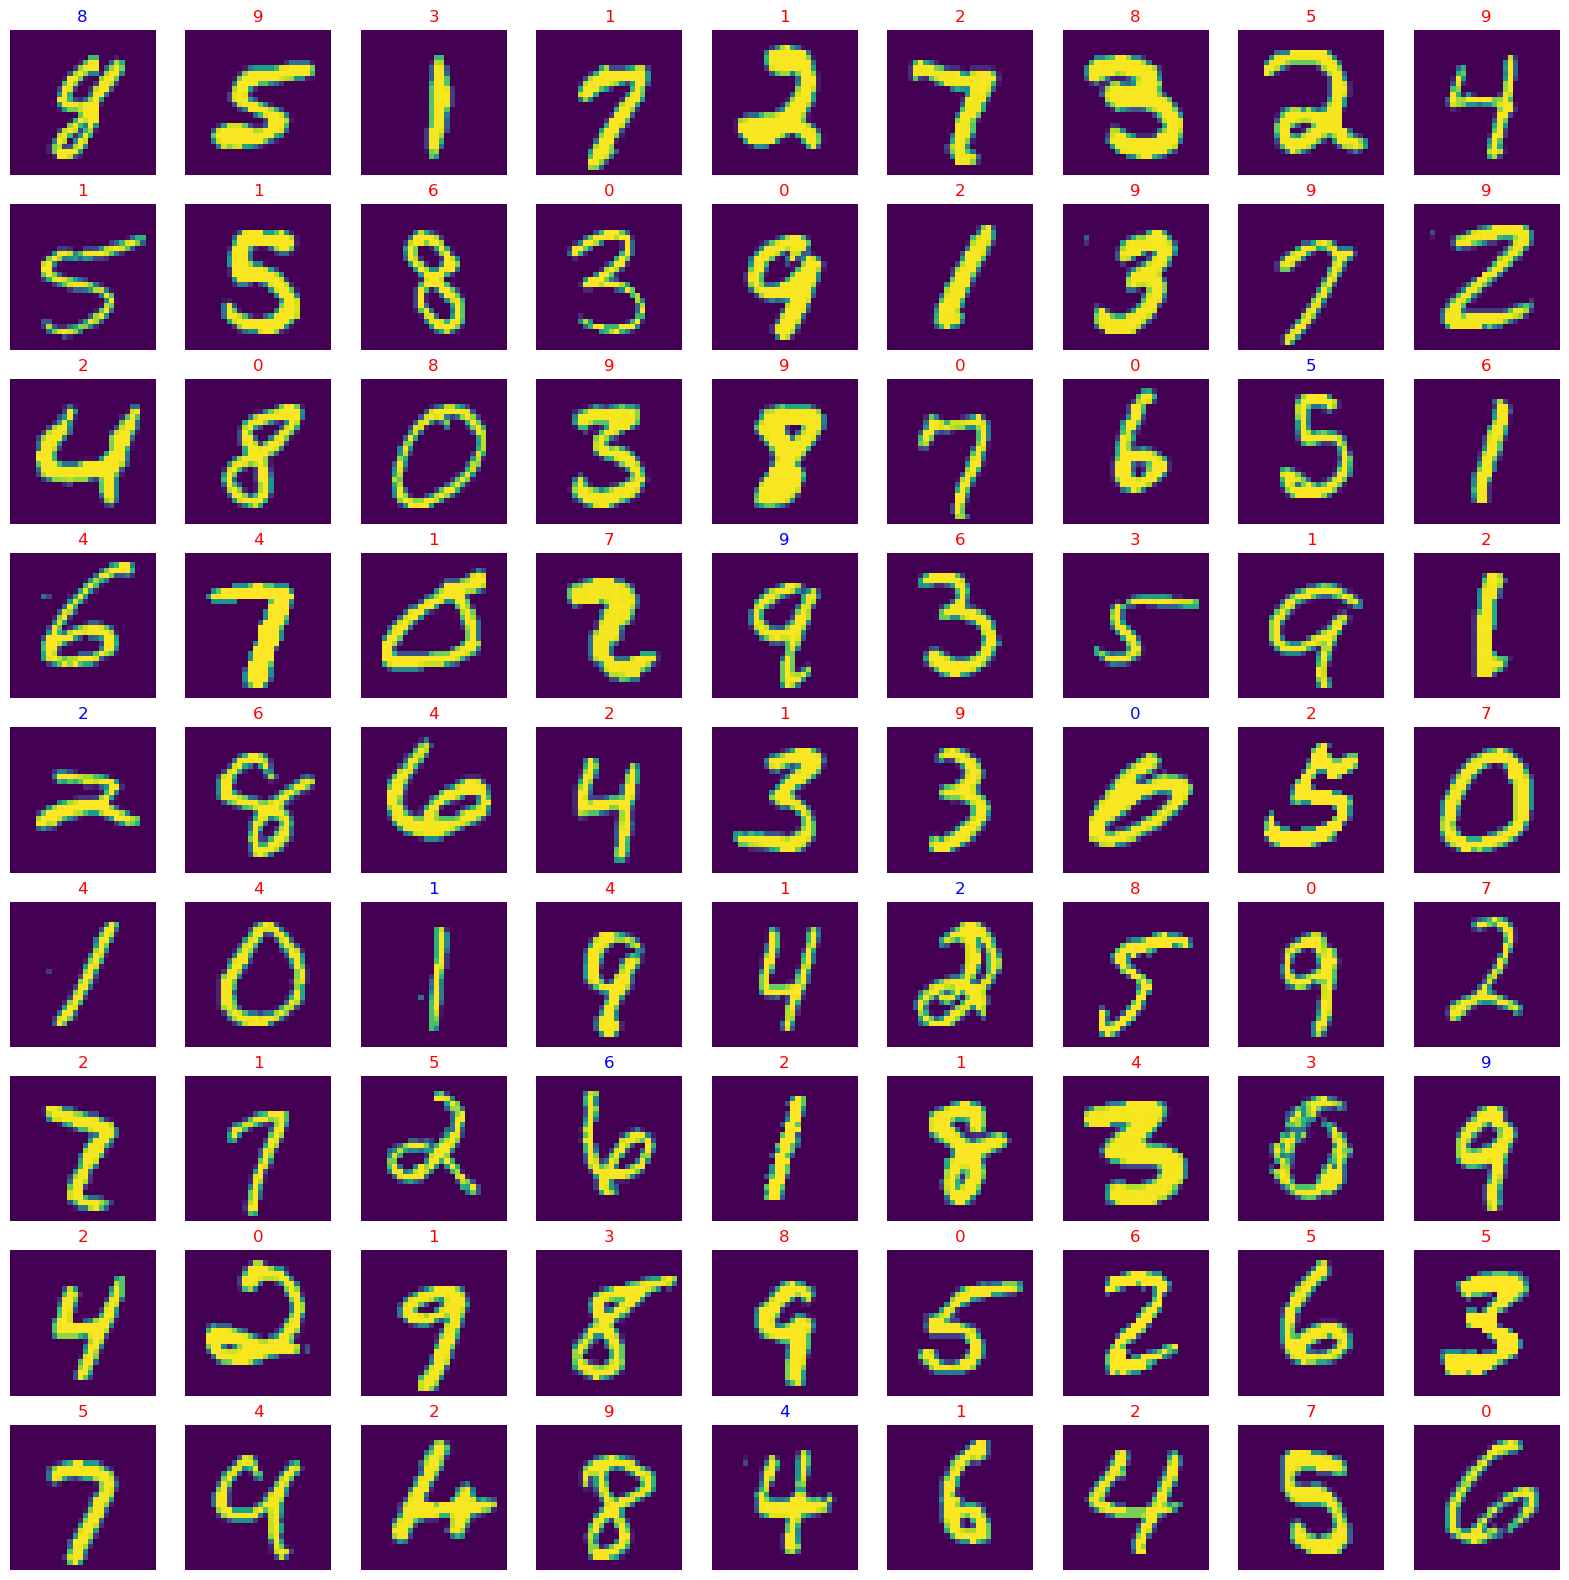

In [25]:
plt.figure(figsize=(20, 20))

for images, labels in ds_test.take(1):
    for i in range(81):
        ax = plt.subplot(9, 9, i+1)
        image = np.squeeze(images[i])
        plt.imshow(image)
        prediction = pred[i] == classes[labels[i]]
        plt.title(pred[i], color=('blue' if prediction else 'red'))
        plt.axis('off')